# Pytorch framework
1. 🌟 What is PyTorch?

PyTorch is an open-source machine learning library developed by Facebook AI Research (FAIR). It was released in 2016 and quickly became one of the most popular tools for deep learning, thanks to its dynamic computation graph (more on that in a sec).

Key Paradigms:

Dynamic Computation Graph – Build models on-the-fly! Think of it like live coding your neural networks. Changes are reflected immediately, making debugging and experimentation easier.

Pythonic – PyTorch feels like native Python. If you can write Python, you can write PyTorch.

GPU-Accelerated – Offload heavy lifting to GPUs with minimal effort.

Why PyTorch Over Keras?

| Feature              | PyTorch                              | Keras                                  |
|---------------------|--------------------------------------|----------------------------------------|
| **Flexibility**      | High – Customize layer by layer      | Moderate – Higher-level abstractions   |
| **Debugging**        | Intuitive – Debug like normal Python | Harder – Graph is static               |
| **Dynamic Graphs**   | Yes                                  | No (TensorFlow 2 has eager mode)       |
| **Industry Adoption**| Research + Production               | Production-centric                     |

In a nutshell: PyTorch is for control freaks and innovators. Keras is for quick prototyping. 😉

2. 🔥 Real-World Applications

PyTorch powers the giants of AI! 🚀 From NLP to computer vision, here's where PyTorch shines:

Transformer Models – Hugging Face’s transformers library is largely PyTorch-based. Think BERT, GPT, and friends!

Style Transfer – Artistic neural networks leveraging PyTorch’s flexibility.

Self-Driving Cars – Tesla uses PyTorch for neural net development.

Medical Imaging – 3D image segmentation and analysis thrive with PyTorch’s dynamic approach.

Reinforcement Learning – PyTorch makes building custom RL environments intuitive.

Why PyTorch?

Ease of Prototyping – Researchers iterate faster.

Custom Architectures – Complex networks are easier to construct.

Massive Ecosystem – Libraries like FastAI, Detectron2 (by Meta), and PyTorch Lightning simplify workflows.

3. 🎯 Interview Goldmine: Most-Asked PyTorch Questions

Be ready to flex your PyTorch muscles with these common interview prompts:

"Explain the difference between PyTorch and TensorFlow."

"How does autograd work in PyTorch?"

"What is the role of torch.nn? How do you define a custom neural network?"

"Explain the concept of a dynamic vs. static computation graph."

"How can you transfer a model to GPU in PyTorch?"Hint: model.to(device) where device = 'cuda' if torch.cuda.is_available() else 'cpu'

"What is the difference between torch.Tensor and torch.autograd.Variable?"

"How do you save and load PyTorch models?"

"Explain the significance of torch.no_grad()."

Pro Tip: Practice building toy models and fiddling with tensors. Debugging tensor shapes will become second nature. 💪

🎨 Remember: PyTorch isn’t just a tool – it’s a playground. Build something weird. Break it. Fix it. Learn. Repeat. Happy coding! 😎



In [2]:
import torch as t

## Basic operations

In [3]:
x = t.tensor(2.0,requires_grad= True)

In [4]:
y = x**2

In [5]:
y.backward()

In [6]:
x.grad

tensor(4.)

## Linear regression using NN module

In [7]:
from torch.nn import Linear

In [8]:
t.manual_seed(986)

In [9]:
x = t.tensor([[1.0], [2.0]])

In [10]:
lr = Linear(in_features= 1, out_features= 1, bias= True)

In [11]:
print("Initialised parameters w and b are:", list(lr.parameters()))

Initialised parameters w and b are: [Parameter containing:
tensor([[-0.8444]], requires_grad=True), Parameter containing:
tensor([-0.9908], requires_grad=True)]


### Initial linear model is:
y = 0.5747x - 0.2117

In [12]:
print("Python dictionary: ",lr.state_dict())
print("keys: ",lr.state_dict().keys())
print("values: ",lr.state_dict().values())

Python dictionary:  OrderedDict({'weight': tensor([[-0.8444]]), 'bias': tensor([-0.9908])})
keys:  odict_keys(['weight', 'bias'])
values:  odict_values([tensor([[-0.8444]]), tensor([-0.9908])])


In [13]:
y_hat = lr(x)

In [14]:
y_hat

tensor([[-1.8352],
        [-2.6795]], grad_fn=<AddmmBackward0>)

In [15]:
from torch.nn import Module

In [16]:
# Customize Linear Regression Class

class LR(Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        
        # Inherit from parent
        super(LR, self).__init__()
        self.linear = Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        out = self.linear(x)
        return out

In [17]:
lr = LR(1, 1)
print("The parameters: ", list(lr.parameters()))
print("Linear model: ", lr.linear)

The parameters: 

 [Parameter containing:
tensor([[-0.9584]], requires_grad=True), Parameter containing:
tensor([-0.9746], requires_grad=True)]
Linear model:  Linear(in_features=1, out_features=1, bias=True)


### Linear model training
While above we learnt how to define initial parameters and linear model. Now, we will proceed to let machine learn these parameters as seprative line. It is customary to define custom module wrap around several which currently is just linear

#### Problem definition
Here we will define a target Y which is dependent on X predictable via -3*x model. The problem will be solved by training our custom defined model without using model for now.

In [21]:
import matplotlib.pyplot as plt

In [19]:
# Create the f(X) with a slope of -3

X = t.arange(-3, 3, 0.1).view(-1, 1) #Where view is equivalent of reshape in numpy
f = -3 * X

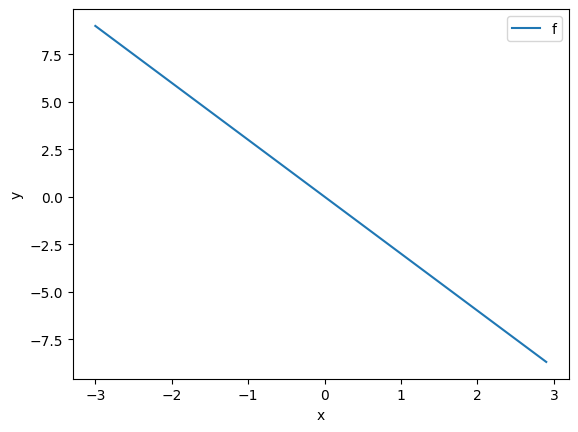

In [22]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [25]:
# Add some noise to f(X) and save it in Y tp make it reflection of more practical situation

Y = f + 0.1 * t.randn(X.size())

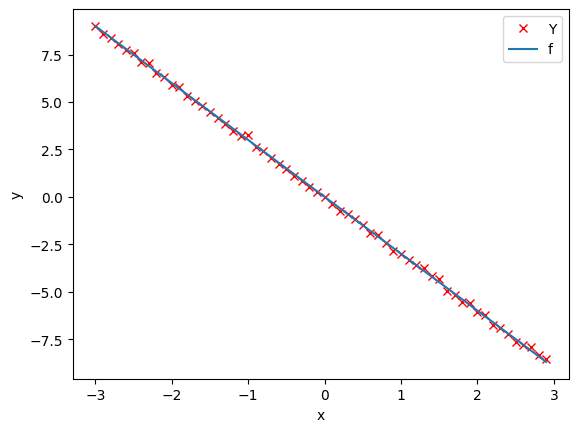

In [28]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')
plt.plot(X.numpy(), f.numpy(), label = 'f')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Defining model using Torch framework

In [30]:
w = t.tensor(-10.0, requires_grad = True)

In [32]:
# Define hyperparameter for gradient descent optimisation
lr = 0.1
LOSS = []

In [37]:
# Create forward function for prediction

def forward(x):
    return w * x

# Create the MSE function for evaluate the result.

def criterion(yhat, y):
    return t.mean((yhat - y) ** 2)

#### Helper functions for visualisation of algo

In [56]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = t.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

In [41]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

#### Define training algorithm

In [58]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        # gradient_plot(Yhat, w, loss.item(), epoch) There exist some problem on plotting helper function
        
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

In [59]:
# Give 4 iterations for training the model here.

train_model(4)

In [60]:
w

tensor(-2.9972, requires_grad=True)